In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
from scipy import stats

In [3]:
df_35_master = pd.read_excel(r'Ethiopia_DTM_-_Site_Assessment_Master_R35_-_all_versions_-_English_-_2024-01-09-07-13-07.xlsx', sheet_name='_hh_member',
                            usecols=[ 'What is the gender of HH Member ${_hmc_}?', 'What is the age HH member ${_hmc_}?', '_submission__uuid'], index_col='_submission__uuid')

In [4]:
df_35_master

,What is the gender of HH Member ${_hmc_}?,What is the age HH member ${_hmc_}?
_submission__uuid,,
4721aebe-8812-4fc7-bfa8-0f0dad3a9838,Male,35.0
4721aebe-8812-4fc7-bfa8-0f0dad3a9838,Female,29.0
4721aebe-8812-4fc7-bfa8-0f0dad3a9838,Female,41.0
4721aebe-8812-4fc7-bfa8-0f0dad3a9838,Male,49.0
4721aebe-8812-4fc7-bfa8-0f0dad3a9838,Female,22.0
...,...,...
9c09cd3e-7207-40a4-801d-81b2a6b6bcee,Female,35.0
9c09cd3e-7207-40a4-801d-81b2a6b6bcee,Female,16.0
9c09cd3e-7207-40a4-801d-81b2a6b6bcee,Male,14.0


In [5]:
df_35_Amhara = pd.read_excel(r'Ethiopia_DTM_-_Site_Assessment_Amhara_R35_-_all_versions_-_English_-_2024-01-09-06-54-34.xlsx', 
                             sheet_name='_hh_member', 
                             usecols=[ 'What is the gender of HH Member ${_hmc_}?', 'What is the age HH member ${_hmc_}?','_submission__uuid'], index_col='_submission__uuid')

In [6]:
df_35_Amhara

,What is the gender of HH Member ${_hmc_}?,What is the age HH member ${_hmc_}?
_submission__uuid,,
88a4a6b5-109a-4dc3-9017-85e86ebccd00,Male,80.0
88a4a6b5-109a-4dc3-9017-85e86ebccd00,Female,75.0
88a4a6b5-109a-4dc3-9017-85e86ebccd00,Male,75.0
88a4a6b5-109a-4dc3-9017-85e86ebccd00,Male,30.0
88a4a6b5-109a-4dc3-9017-85e86ebccd00,Female,22.0
...,...,...
d17f8a4d-f361-454b-a518-0ddac76a83f8,Male,35.0
d17f8a4d-f361-454b-a518-0ddac76a83f8,Female,32.0
d17f8a4d-f361-454b-a518-0ddac76a83f8,Female,17.0


In [7]:
df_demo_merged_35 = pd.concat([df_35_master, df_35_Amhara], axis=0)

In [8]:
df_VAS_master = pd.read_excel(r'Ethiopia_DTM_-_Village_Assessment_Survey_Master_R18_-_all_versions_-_English_-_2024-01-09-06-48-37.xlsx',sheet_name='_hh_member')

In [9]:
df_VAS_Amhara = pd.read_excel(r'Ethiopia_DTM_-_Village_Assessment_Survey_Amhara_R18_-_all_versions_-_English_-_2024-01-09-06-48-47.xlsx',sheet_name='_hh_member')

In [10]:
df_demo_merged_Vas = pd.concat([df_VAS_master, df_VAS_Amhara], axis=0)

In [11]:
df_demo_merged_Vas

,_hmc_,"What is the gender of <span style=""color:red; font-family:fantasy;"">HH Member ${_hmc_} </span>?","What is the age <span style=""color:red; font-family:fantasy;"">HH member ${_hmc_} </span>?",Age of HH member,Age Lessthan 17,_index,_parent_table_name,_parent_index,_submission__id,_submission__uuid,_submission__submission_time,_submission__validation_status,_submission__notes,_submission__status,_submission__submitted_by,_submission___version__,_submission__tags
0,1,Male,32.0,32.0,1,1,new_demographic_calculator,1,7273593,8cc91cbf-cbd9-4e26-9fb4-f94b5e9ec61e,2023-12-03 10:15:55,NaN,NaN,submitted_via_web,eth_dtm_enum,v7Gy85JGM3dFpuumWMd5DU,NaN
1,2,Female,28.0,28.0,1,2,new_demographic_calculator,1,7273593,8cc91cbf-cbd9-4e26-9fb4-f94b5e9ec61e,2023-12-03 10:15:55,NaN,NaN,submitted_via_web,eth_dtm_enum,v7Gy85JGM3dFpuumWMd5DU,NaN
2,3,Female,8.0,8.0,0,3,new_demographic_calculator,1,7273593,8cc91cbf-cbd9-4e26-9fb4-f94b5e9ec61e,2023-12-03 10:15:55,NaN,NaN,submitted_via_web,eth_dtm_enum,v7Gy85JGM3dFpuumWMd5DU,NaN
3,4,Male,6.0,6.0,0,4,new_demographic_calculator,1,7273593,8cc91cbf-cbd9-4e26-9fb4-f94b5e9ec61e,2023-12-03 10:15:55,NaN,NaN,submitted_via_web,eth_dtm_enum,v7Gy85JGM3dFpuumWMd5DU,NaN
4,5,Female,4.0,4.0,0,5,new_demographic_calculator,1,7273593,8cc91cbf-cbd9-4e26-9fb4-f94b5e9ec61e,2023-12-03 10:15:55,NaN,NaN,submitted_via_web,eth_dtm_enum,v7Gy85JGM3dFpuumWMd5DU,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183176,7,Male,3.0,3.0,0,183177,new_demographic_calculator,48703,7819234,02f1bc02-38e2-4f0b-ab49-840b2c261c76,2024-01-03 06:09:54,NaN,NaN,submitted_via_web,eth_dtm_enum,vDeQ6VKRiFiDtCajzK7Nkb,NaN
183177,8,Female,1.0,1.0,0,183178,new_demographic_calculator,48703,7819234,02f1bc02-38e2-4f0b-ab49-840b2c261c76,2024-01-03 06:09:54,NaN,NaN,submitted_via_web,eth_dtm_enum,vDeQ6VKRiFiDtCajzK7Nkb,NaN
183178,1,Male,65.0,65.0,1,183179,new_demographic_calculator,48704,7819234,02f1bc02-38e2-4f0b-ab49-840b2c261c76,2024-01-03 06:09:54,NaN,NaN,submitted_via_web,eth_dtm_enum,vDeQ6VKRiFiDtCajzK7Nkb,NaN
183179,2,Female,55.0,55.0,1,183180,new_demographic_calculator,48704,7819234,02f1bc02-38e2-4f0b-ab49-840b2c261c76,2024-01-03 06:09:54,NaN,NaN,submitted_via_web,eth_dtm_enum,vDeQ6VKRiFiDtCajzK7Nkb,NaN


In [12]:
df_35_me = pd.read_excel(r'Merged_Ethiopia DTM - SA R35 Dataset_Without South Ethiopia.xlsx')

In [13]:
df_outlier = df_demo_merged_35[df_demo_merged_35['What is the age HH member ${_hmc_}?']>= 120].sort_values(by='What is the age HH member ${_hmc_}?', ascending=False )
df_outlier.head(10)

,What is the gender of HH Member ${_hmc_}?,What is the age HH member ${_hmc_}?
_submission__uuid,,
5c2d7df0-6812-49ca-813c-bff5c723e51f,Female,3326.0
83ed1f73-c706-44d2-b668-098dbd31b839,Male,3028.0
6c02b991-0cf9-49c9-a66d-e01276012bc3,Female,1001.0
6c02b991-0cf9-49c9-a66d-e01276012bc3,Male,1001.0
6c02b991-0cf9-49c9-a66d-e01276012bc3,Male,1001.0
6c02b991-0cf9-49c9-a66d-e01276012bc3,Male,1001.0
2963245a-3473-4f62-bfcd-6994f1c46058,Female,910.0
dc81d3f3-3b3b-44a8-9db8-52302284c511,Female,879.0
2ea5d47d-4081-4aa3-97b2-f15f2fc68a0d,Male,818.0


In [ ]:
df_35_rprHH = pd.read_excel(r'Ethiopia DTM - SA R36 and R35 Consolidated Dataset_With South Ethiopia.xlsx', sheet_name='Repr Sampling Demo')

In [ ]:
df_35_rprHH.columns

In [ ]:
df_35_me[ '1.1.e.1: Region'].value_counts()

In [ ]:
df_demo_ = df_35_me[['1.1.c.1: Site ID', '1.1.d.1: Site Name', '1.1.e.1: Region', '1.1.e.2: Zone','1.1.e.3: Woreda','1.1.e.4: Kebele', '_uuid']].merge(
    df_demo_merged_35, left_on = '_uuid', right_on= '_submission__uuid', how='inner'
)
df_demo_.shape

In [ ]:
df_r35_site_level = df_demo_merged_35.groupby(['_submission__uuid'])['What is the age HH member ${_hmc_}?'].mean()

In [ ]:
df_36 = pd.read_excel(r'Ethiopia DTM - SA R36 Dataset.xlsx')

In [ ]:
df_36.shape

In [ ]:
df_36_hh = pd.read_excel(r'Ethiopia_DTM_-_Site_Assessment_R36_-_all_versions_-_English_-_2024-05-06-06-16-30.xlsx', sheet_name='_hh_member',
                        usecols=['What is the gender of HH Member ${_hmc_}?', 'What is the age HH member ${_hmc_}?','_submission__uuid'])

In [ ]:
df_19_VAS_hh = pd.read_excel(r'Ethiopia_DTM_-_Village_Assessment_Survey_R19_-_all_versions_-_English_-_2024-05-06-06-45-37.xlsx', sheet_name='_hh_member')

In [ ]:
df_36_hh.shape

In [ ]:
df_36_merged = df_36[['1.1.c.1: Site ID', '1.1.d.1: Site Name', '1.1.e.1: Region','1.1.e.2: Zone', '1.1.e.3: Woreda', '_uuid']].merge(
    df_36_hh, left_on =  '_uuid', right_on='_submission__uuid',how= 'inner')

In [ ]:
df_35_extracted = df_demo_[df_demo_['1.1.c.1: Site ID'].isin(df_36_merged['1.1.c.1: Site ID'])]

In [ ]:
df_36_extracted = df_36_merged[df_36_merged['1.1.c.1: Site ID'].isin(df_demo_['1.1.c.1: Site ID'])]

In [ ]:
df_36_extracted.describe()

In [ ]:
df35 = df_35_extracted[df_35_extracted['What is the age HH member ${_hmc_}?']<=100]

In [ ]:
df35

In [ ]:
var = df35['What is the age HH member ${_hmc_}?']
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))


fig = plt.figure(figsize=(10,4))


plt.hist(var)


plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

plt.title('Age Distribution Round 35')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [ ]:
var = df_36_extracted['What is the age HH member ${_hmc_}?']
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))


fig = plt.figure(figsize=(10,4))


plt.hist(var)


plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

plt.title('Age Distribution Round 36')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [ ]:
df_36_extracted.describe()

In [ ]:
var = df35['What is the age HH member ${_hmc_}?']
fig = plt.figure(figsize=(10,4))
plt.boxplot(var, vert= False)
plt.xticks(np.arange(0, 105, 5))
plt.title('Age Distribution R35')


var = df_36_extracted['What is the age HH member ${_hmc_}?']
fig = plt.figure(figsize=(10,4))
plt.boxplot(var, vert= False)
plt.xticks(np.arange(0, 105, 5))
plt.title('Age Distribution 36')

In [ ]:
var = df_36_extracted['What is the age HH member ${_hmc_}?']
fig = plt.figure(figsize=(10, 4))
plt.boxplot(var, vert=False)

mean_age = np.mean(var)
plt.scatter(mean_age, 1, color='red', zorder=3, label='Mean')

# Adding median and quartiles to the plot
median_age = np.median(var)
q1_age = np.percentile(var, 25)
q3_age = np.percentile(var, 75)

plt.scatter(median_age, 1, color='blue', zorder=3, label='Median')
plt.scatter(q1_age, 1, color='green', zorder=3, label='Q1 (25th percentile)')
plt.scatter(q3_age, 1, color='purple', zorder=3, label='Q3 (75th percentile)')



# Adding labels and title
plt.xticks(np.arange(0, 105, 5))
plt.title('Age Distribution Round 36')
plt.xlabel('Age')
plt.legend()

# Show plot
plt.show()


In [ ]:
plt.savefig('Age Distribution Round 36.png')

In [ ]:
var = df35['What is the age HH member ${_hmc_}?']
fig = plt.figure(figsize=(10, 4))
plt.boxplot(var, vert=False)

mean_age = np.mean(var)
plt.scatter(mean_age, 1, color='red', zorder=3, label='Mean')

# Adding median and quartiles to the plot
median_age = np.median(var)
q1_age = np.percentile(var, 25)
q3_age = np.percentile(var, 75)

plt.scatter(median_age, 1, color='blue', zorder=3, label='Median')
plt.scatter(q1_age, 1, color='green', zorder=3, label='Q1 (25th percentile)')
plt.scatter(q3_age, 1, color='purple', zorder=3, label='Q3 (75th percentile)')



# Adding labels and title
plt.xticks(np.arange(0, 105, 5))
plt.title('Age Distribution Round 35')
plt.xlabel('Age')
plt.legend()

# Show plot
plt.show()

In [ ]:
df35

In [ ]:
df35_1 = df35.groupby(['_uuid', '1.1.c.1: Site ID'])['What is the age HH member ${_hmc_}?'].count()

In [ ]:
df37_2 = pd.DataFrame(df35_1)

In [ ]:
df37_2['round'] = 'round 35'

In [ ]:
df37_2

In [ ]:
df36_1 = df_36_extracted.groupby(['_submission__uuid', '1.1.c.1: Site ID'])['What is the age HH member ${_hmc_}?'].mean()

In [ ]:
df36_1

In [ ]:
df36_2 = pd.DataFrame(df36_1)

In [ ]:
df36_2['round'] = 'round 36'

In [ ]:
df_consolidated = df_35_rprHH.groupby(['1.1.c.1: Site ID'] )['Number of member of HH'].mean()
df_consolidated

In [ ]:
df_forTest = pd.concat([df37_2, df36_2], axis= 0)

In [ ]:
df_cons = pd.DataFrame(df_consolidated)

In [ ]:
df_main = df_forTest.merge(df_cons, on= '1.1.c.1: Site ID', how= 'left')

In [ ]:
df_main

In [ ]:
from scipy.stats import shapiro
df = pd.DataFrame(df_main)
stat, p_value = shapiro(df['Number of member of HH'])
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
alpha = 0.05
if p_value > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


In [ ]:
from scipy.stats import ttest_ind
df = pd.DataFrame(df_main)

# Split the data by groups
group1 = df[df['round'] == 'round 35']['Number of member of HH']
group2 = df[df['round'] == 'round 36']['Number of member of HH']

# Perform Welch's t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


In [ ]:
from scipy.stats import mannwhitneyu

df = pd.DataFrame(df_main)

group1 = df[df['round'] == 'round 35']['Number of member of HH']
group2 = df[df['round'] == 'round 36']['Number of member of HH']

stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

alpha = 0.05
if p_value > alpha:
    print('Fail to reject the null hypothesis (samples are similar)')
else:
    print('Reject the null hypothesis (samples are different)')


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

df = pd.DataFrame(df_main)
group1 = df[df['round'] == 'round 35']['Number of member of HH']
group2 = df[df['round'] == 'round 36']['Number of member of HH']
stat, p_value = ttest_ind(group1, group2)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
alpha = 0.05
if p_value > alpha:
    print('Fail to reject the null hypothesis (samples are similar)')
else:
    print('Reject the null hypothesis (samples are different)')


In [ ]:
def show_density(var_data):
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(10,4))
    var_data.plot.density()
    plt.title('Age Data Density')
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)
    plt.show()
col = df['What is the age HH member ${_hmc_}?']
show_density(col)

In [ ]:
df_demo_merged_35 = df_demo_merged_35[df_demo_merged_35['What is the age HH member ${_hmc_}?']<=100]

In [ ]:
df_demo_merged_Vas= df_demo_merged_Vas[df_demo_merged_Vas['Age of HH member']<=100]

In [ ]:
df_19_VAS_hh = df_19_VAS_hh[df_19_VAS_hh['Age of HH member']<=100]

In [ ]:
df_36_hh = df_36_hh[df_36_hh['What is the age HH member ${_hmc_}?']<=100]

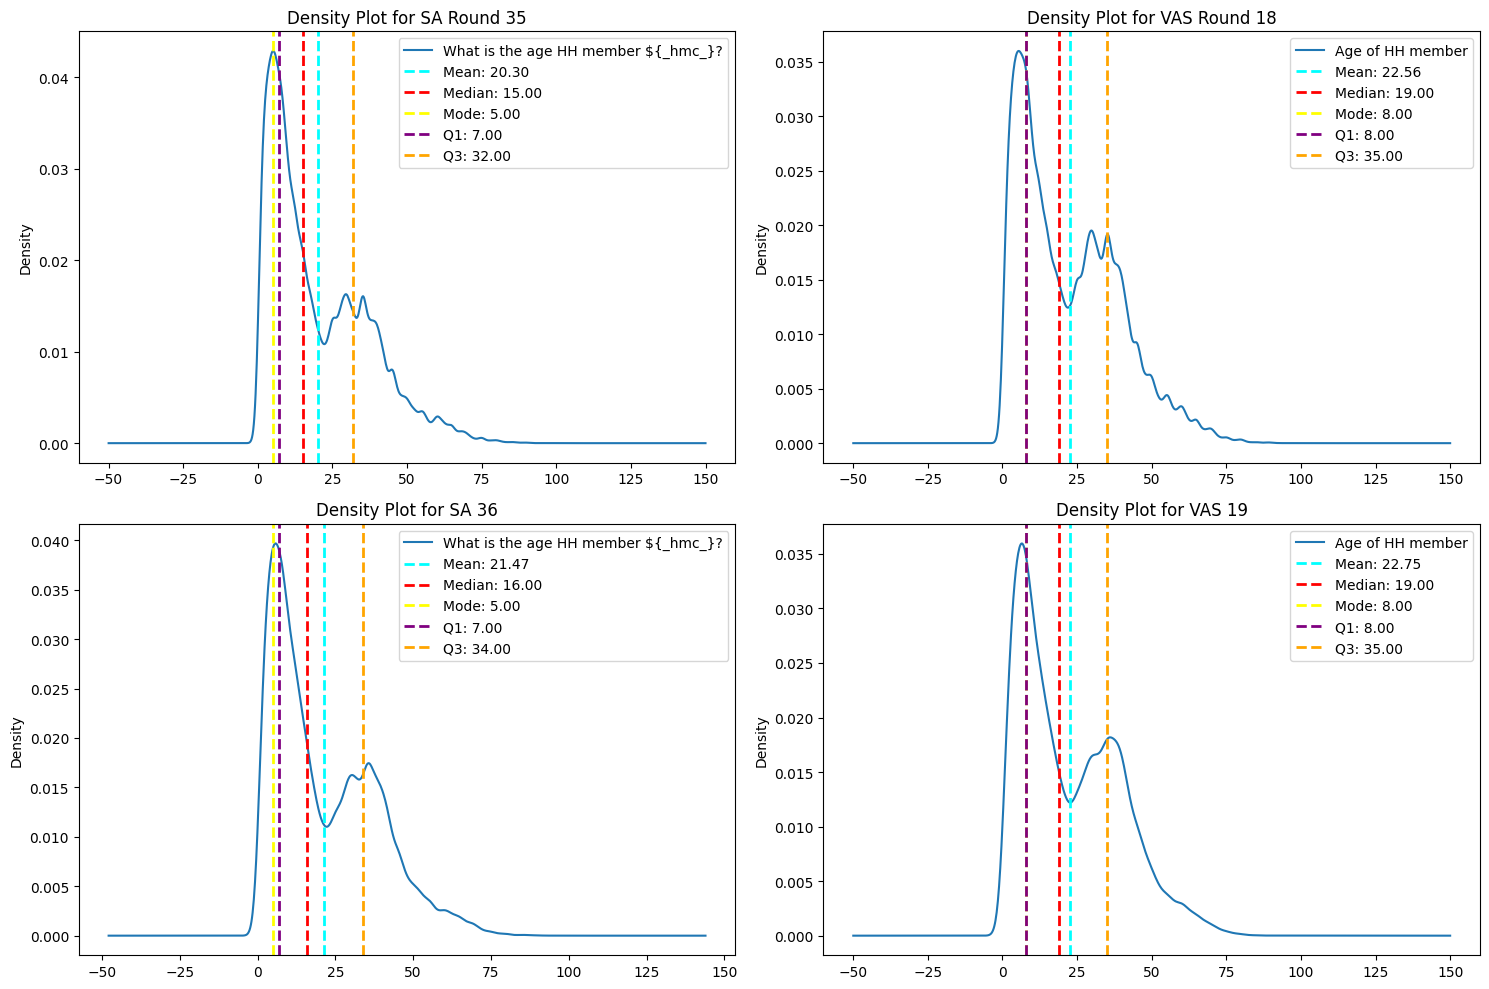

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data initialization for demonstration
# Assuming df_demo_merged_35, df_demo_merged_Vas, df_36_hh, and df_19_VAS_hh exist in your workspace

df1 = pd.DataFrame(df_demo_merged_35)
df2 = pd.DataFrame(df_demo_merged_Vas)
df3 = pd.DataFrame(df_36_hh)
df4 = pd.DataFrame(df_19_VAS_hh)

def show_density(var_data):
    # Plot density
    var_data.plot.density()

    # Calculate statistics
    mean_val = var_data.mean()
    median_val = var_data.median()
    mode_val = var_data.mode()[0]
    q1_val = var_data.quantile(0.25)
    q3_val = var_data.quantile(0.75)

    # Add vertical lines for mean, median, and mode
    plt.axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(x=median_val, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    plt.axvline(x=mode_val, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_val:.2f}')

    # Add vertical lines for the quartiles
    plt.axvline(x=q1_val, color='purple', linestyle='dashed', linewidth=2, label=f'Q1: {q1_val:.2f}')
    plt.axvline(x=q3_val, color='orange', linestyle='dashed', linewidth=2, label=f'Q3: {q3_val:.2f}')

    # Add legend
    plt.legend()

fig, axes = plt.subplots(2, 2, figsize=(15,10))

plt.subplot(221)
show_density(df1['What is the age HH member ${_hmc_}?'])
plt.title('Density Plot for SA Round 35')

plt.subplot(222)
show_density(df2['Age of HH member'])
plt.title('Density Plot for VAS Round 18')

plt.subplot(223)
show_density(df3['What is the age HH member ${_hmc_}?'])
plt.title('Density Plot for SA 36')

plt.subplot(224)
show_density(df4['Age of HH member'])
plt.title('Density Plot for VAS 19')

plt.tight_layout()
plt.show()
